In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import catboost as cb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_log_error


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_QoiMO9B.csv')
center = pd.read_csv('fulfilment_center_info.csv')
meal = pd.read_csv('meal_info.csv')

In [3]:
train=pd.merge(train,center,how='left',on=['center_id'])
test=pd.merge(test,center,how='left',on=['center_id'])
train=pd.merge(train,meal,how='left',on=['meal_id'])
test=pd.merge(test,meal,how='left',on=['meal_id'])
test['num_orders'] = 0
train.shape,test.shape

((456548, 15), (32573, 15))

In [21]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


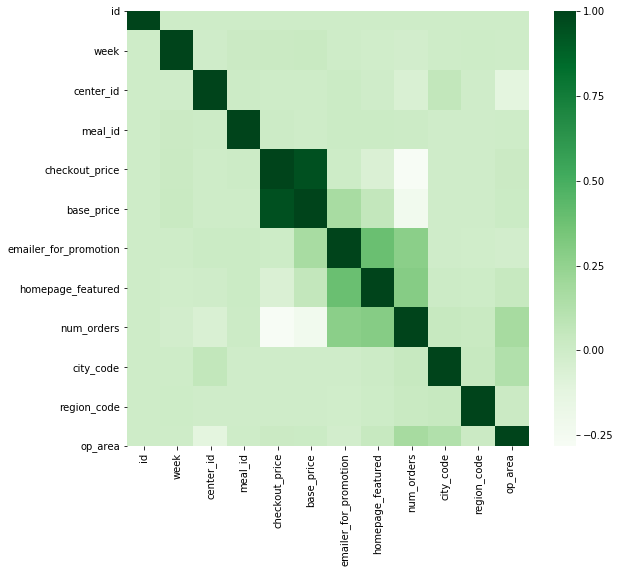

In [4]:
from matplotlib.pyplot import figure
plt.figure(figsize = (9,8))
corr = train.corr()
sns.heatmap(corr, cmap="Greens")#, annot = True)

In [5]:
corr.num_orders

id                       0.000702
week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
op_area                  0.176976
Name: num_orders, dtype: float64

In [6]:
train_subset = train[0: 423974]
val_set = train[423975:]

In [7]:
y = train_subset.num_orders

In [22]:
features =[ 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'op_area', 'category']

In [23]:
x = train_subset[features]

In [44]:
cat_ind = [2,3,5]

In [88]:
cat = cb.CatBoostRegressor(iterations=60, depth=3, loss_function='RMSE',one_hot_max_size=5,random_seed=2018)

In [89]:
cat.fit(x,y,cat_features= cat_ind, verbose=True)

0:	learn: 398.5982917	total: 216ms	remaining: 12.8s
1:	learn: 393.8386908	total: 358ms	remaining: 10.4s
2:	learn: 389.2797247	total: 478ms	remaining: 9.07s
3:	learn: 384.9257919	total: 622ms	remaining: 8.71s
4:	learn: 380.7410791	total: 761ms	remaining: 8.37s
5:	learn: 376.9078957	total: 864ms	remaining: 7.78s
6:	learn: 372.9028063	total: 983ms	remaining: 7.44s
7:	learn: 369.4086980	total: 1.13s	remaining: 7.36s
8:	learn: 365.7061804	total: 1.28s	remaining: 7.24s
9:	learn: 362.4342800	total: 1.4s	remaining: 6.98s
10:	learn: 358.9848048	total: 1.5s	remaining: 6.7s
11:	learn: 355.9887550	total: 1.62s	remaining: 6.48s
12:	learn: 352.8174212	total: 1.75s	remaining: 6.33s
13:	learn: 349.8774778	total: 1.9s	remaining: 6.23s
14:	learn: 347.1222286	total: 2.03s	remaining: 6.1s
15:	learn: 344.3321486	total: 2.13s	remaining: 5.87s
16:	learn: 341.8746894	total: 2.26s	remaining: 5.72s
17:	learn: 339.3003922	total: 2.41s	remaining: 5.63s
18:	learn: 336.9047442	total: 2.56s	remaining: 5.53s
19:	lear

In [90]:
x_test = test[features]
pred_cat = cat.predict(x_test)

print(mean_squared_log_error(abs(val_set.num_orders),abs(pred_cat)))

1.9674476978912903


In [48]:
cat.tree_count_



150

In [42]:
cat.feature_importances_

array([20.47787452,  4.76144253, 11.35377113, 13.92254308,  9.68989409,
       32.68319157,  2.40181034,  0.2015257 ,  4.50794705])

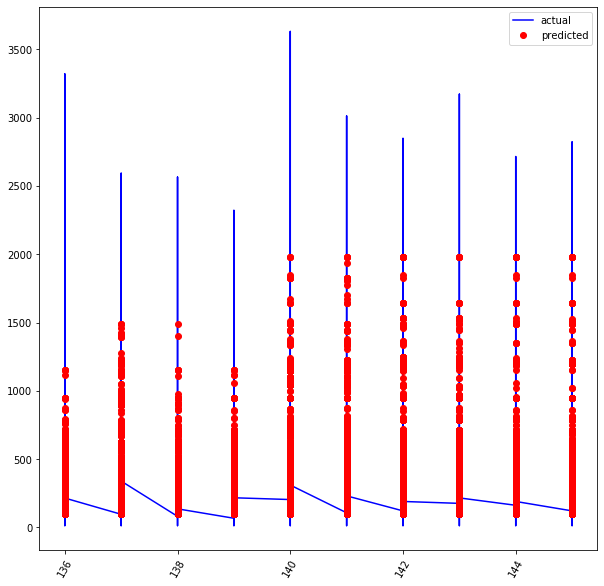

In [91]:
plt.figure(figsize = (10,10))
plt.plot(val_set.week,val_set.num_orders,'b-',label='actual')
plt.plot(val_set.week,pred_cat,'ro',label='predicted')
plt.xticks(rotation = '60'); 
plt.legend()

In [92]:
sub_df = pd.DataFrame(columns=['id', 'num_orders'])
sub_df['id'] = test['id']
sub_df['num_orders'] = pred_cat
sub_df.to_csv('result_cat_separate.csv', index=False)

In [93]:
sub_df

,id,num_orders
0,1028232,360.070433
1,1127204,360.070433
2,1212707,224.274186
3,1082698,108.424911
4,1400926,108.424911
...,...,...
32568,1250239,118.187408
32569,1039516,118.187408
32570,1158107,449.189139
32571,1444235,429.888932
